In [1]:
from numpy import array
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import EarlyStopping

from sklearn.model_selection import train_test_split,StratifiedKFold
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Using TensorFlow backend.


In [ ]:
S1 = ["A","A","G","T","A"]
S2 = ["C","G","A","T","C"]
S3 = ["C","C","G","T","A"]

S = [S1,S2,S3]
s_arr = array(S)
s_arr.shape

In [ ]:
for i in range(0, 3):
    for j in range(0, 5):
        if S[i][j] == 'A':
            S[i][j] = list([1,0,0,0,0,0,0,0])
        if S[i][j] == 'C':
            S[i][j] = list([0,1,0,0,0,0,0,0])
        if S[i][j] == 'G':
            S[i][j] = list([0,0,1,0,0,0,0,0])
        if S[i][j] == 'T':
            S[i][j] = list([0,0,0,1,0,0,0,0])
        
type(S)

In [ ]:
ds_array = array(S)
ds_array.shape

In [5]:
NotebookApp.iopub_data_rate_limit=100000000000
NotebookApp.rate_limit_window=30.0

NameError: name 'NotebookApp' is not defined

In [ ]:
def charToList (char)
    if char == 'A':
        charList=(list([1,0])
    if char == 'C':
        charList=list([2,0]))
    if char == 'G':
        charList=list([3,0])
    if char == 'T':
        charList=list([4,0])      
    return charList

In [4]:
import csv
with open('sequence.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
    labels = []
    texts = []
    chars = []
    first = []
    second = []
    for row in readCSV:
        label = row[1]
        text = row[0]

        labels.append(label)
        for char in text:
            #print(char)
            if char == 'A':
                chars.append(list([1,0,0]))
            if char == 'C':
                chars.append(list([2,0,0]))
            if char == 'G':
                chars.append(list([3,0,0]))
            if char == 'T':
                chars.append(list([4,0,0]))           
            if char == ']':
                second = chars.pop()
                first = chars.pop()
                first [1] = 1
                first [2] = second [0]
                print(first)
                chars.append(first) 
                
        texts.append(chars)

text_array = array(texts)
label_array = array(labels)

text_array.shape

[1, 1, 3]
[2, 1, 4]
[2, 1, 4]


(3, 24, 3)

In [85]:
label_array = list(map(int, label_array))
label_array

[0, 1, 0]

In [2]:
# define model   Stacked LSTM
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(text_array.shape[1], text_array.shape[2])))
model.add(LSTM(50, activation='relu', recurrent_dropout = 0.2, dropout = 0.2))
model.add(Dense(1, activation='softmax'))

model.compile(optimizer='adam', loss='mse')

W0627 22:10:54.296894 10120 deprecation_wrapper.py:119] From D:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.



NameError: name 'text_array' is not defined

In [106]:
## one way of Split training with validation_split

early_stopping_monitor = EarlyStopping(patience=3)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(text_array, label_array,batch_size=2 , epochs=10, validation_split=0.2 ,callbacks=[early_stopping_monitor])

Train on 2 samples, validate on 1 samples
Epoch 1/10
2/2 [==============================] - 2s 889ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 2/10
2/2 [==============================] - 0s 10ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 3/10
2/2 [==============================] - 0s 10ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 15.9424 - val_acc: 0.0000e+00
Epoch 4/10
2/2 [==============================] - 0s 10ms/step - loss: 7.9712 - acc: 0.5000 - val_loss: 15.9424 - val_acc: 0.0000e+00


In [107]:
# evaluate LSTM model // should be done by evaluation data
score, acc = model.evaluate(text_array, label_array, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
print('Test score:', score)
print('Test accuracy:', acc)

acc: 33.33%
Test score: 10.628256797790527
Test accuracy: 0.3333333432674408


### we don't need it here
### convert integers to dummy variables (i.e. one hot encoded)

encoded_Y = np_utils.to_categorical(label_array)

print("encoded_Y=", encoded_Y) 

In [108]:
predict = model.predict(X_test)
predict

array([[1.]], dtype=float32)

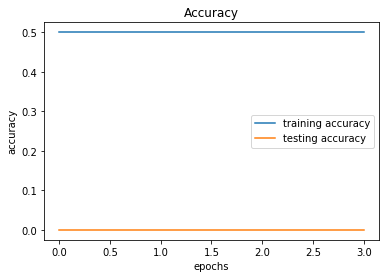

In [109]:

import matplotlib.pyplot as plt

plt.plot(history.history['acc'], label='training accuracy')
plt.plot(history.history['val_acc'], label='testing accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

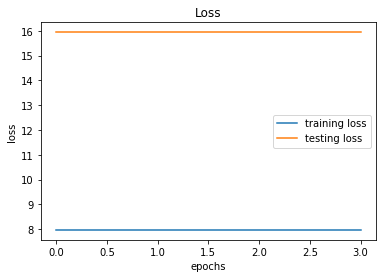

In [110]:
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='testing loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [111]:
## anothe way of Split training with train_test_split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(text_array, label_array, test_size=0.33, random_state=42)

# fit model
model.fit(X_train, y_train, epochs=200, verbose=0)

In [114]:
pre_cls = model.predict(X_test)
pre_cls

array([[1.]], dtype=float32)

In [93]:
from sklearn.metrics import classification_report

#y_test = np.argmax(y_test, axis=0)
print(y_test)
print(predict)


[0]
[[1.]]


In [115]:
cm1 = confusion_matrix(y_test,pre_cls)
print('Confusion Matrix : \n')
print(cm1)



Confusion Matrix : 

[[0 1]
 [0 0]]


In [118]:
print(classification_report(y_test,pre_cls))

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         1
         1.0       0.00      0.00      0.00         0

   micro avg       0.00      0.00      0.00         1
   macro avg       0.00      0.00      0.00         1
weighted avg       0.00      0.00      0.00         1



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\ProgramData\Anaconda3\lib\sit